In [33]:

import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Dropout,Conv2D
from sklearn.model_selection import train_test_split
import csv
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
main = pd.read_csv('dataset/nba.games.stats - nba_2018.csv')
home = pd.read_csv('dataset/nba.games.stats - nba_prev.csv',usecols=['Team'])
away = pd.read_csv('dataset/nba.games.stats - nba_prev.csv',usecols=['Opponent']).values
ha = pd.read_csv('dataset/nba.games.stats - nba_prev.csv',usecols=['Home']).values

home = encoder.fit_transform(home)
away = encoder.fit_transform(away)
homeaway = encoder.fit_transform(ha)

new = np.append(home,away,axis=1)
# new2 = pd.read_csv('dataset/nba.games.stats - nba_prev.csv',usecols=['FieldGoals','FieldGoalsAttempted','FieldGoals.','X3PointShots','X3PointShotsAttempted','X3PointShots.','FreeThrows','FreeThrowsAttempted','FreeThrows.','OffRebounds','TotalRebounds','Assists','Steals','Blocks','Turnovers','TotalFouls',
#                         'Opp.FieldGoals', 'Opp.3PointShotsAttempted', 'Opp.3PointShots.', 'Opp.FreeThrows', 
#                         'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds', 
#                         'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls',
#                         'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.', 'Opp.3PointShots']).values

new2 = pd.read_csv('dataset/nba.games.stats - nba_prev.csv',usecols=['FieldGoalsAttempted','FreeThrows','FreeThrowsAttempted','FreeThrows.','OffRebounds','TotalRebounds','Assists','Steals','Blocks','Turnovers','TotalFouls',
                        'Opp.FreeThrows', 
                        'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds', 
                        'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls',
                        'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.', 'Opp.3PointShots']).values


new3 = np.append(new,homeaway,axis=1)
new2 = np.append(new3,new2,axis=1)
winLoss =  pd.read_csv('dataset/nba.games.stats - nba_prev.csv',usecols=['WINorLOSS']).values
winLoss = encoder.fit_transform(winLoss)
points = pd.read_csv('dataset/nba.games.stats - nba_prev.csv',usecols=['TeamPoints','OpponentPoints']).values
points = np.append(points,winLoss,axis=1)
# points.shape
# points = winLoss
# X_train, X_test, y_train, y_test = train_test_split(new2, winLoss, test_size=0.0001)
X_train = new2
y_train = winLoss
#MODEL
model = Sequential()
keras.optimizers.adam(lr=0.1)
model.add(Dense(30, activation='relu',input_dim=85))
model.add(Dropout(0.30))
# model.add(Dense(46, activation='relu'))
# model.add(Dense(30, activation='sigmoid'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))

# model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(np.asarray(X_train),np.asarray(y_train), epochs=40,batch_size=100)
# print(model.evaluate(X_test,y_test))

predict = np.asarray([new2[674]])


Epoch 1/40
7848/7848 [==============================] - 1s 122us/step - loss: 1.0122 - acc: 0.5113
Epoch 2/40
7848/7848 [==============================] - 0s 24us/step - loss: 0.6843 - acc: 0.5833
Epoch 3/40
7848/7848 [==============================] - 0s 26us/step - loss: 0.5897 - acc: 0.6886
Epoch 4/40
7848/7848 [==============================] - 0s 24us/step - loss: 0.5218 - acc: 0.7388
Epoch 5/40
7848/7848 [==============================] - 0s 25us/step - loss: 0.4697 - acc: 0.7712
Epoch 6/40
7848/7848 [==============================] - 0s 33us/step - loss: 0.4449 - acc: 0.7873
Epoch 7/40
7848/7848 [==============================] - 0s 29us/step - loss: 0.4188 - acc: 0.8031
Epoch 8/40
7848/7848 [==============================] - 0s 24us/step - loss: 0.3940 - acc: 0.8175
Epoch 9/40
7848/7848 [==============================] - 0s 25us/step - loss: 0.3822 - acc: 0.8247
Epoch 10/40
7848/7848 [==============================] - 0s 32us/step - loss: 0.3725 - acc: 0.8319
Epoch 11/40
7848/7

In [37]:
predict = np.asarray([new2[674]])
print(predict)
model.predict(predict)
# home[230]

[[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     1.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     1.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.    82.    14.    19.     0.737  7.    42.    26.     7.     2.
  17.    21.    95.     0.526 13.     9.    16.     0.563 13.    49.
  30.     8.     4.     8.    16.   ]]


array([[0.0014057]], dtype=float32)

In [36]:
teams = pd.read_csv('dataset/nba.games.stats - nba_prev.csv')
print(teams.loc[teams['Team']=='PHI'])

      Unnamed: 0 Team  Game        Date  Home Opponent WINorLOSS  TeamPoints  \
10         15112  PHI    15  2017-11-18  Home      GSW         L         116   
55         14112  PHI    14  2017-11-15  Away      LAL         W         115   
80         13115  PHI    13  2017-11-13  Away      LAC         W         109   
110        12128  PHI    12  2017-11-11  Away      GSW         L         114   
138        11151  PHI    11  2017-11-09  Away      SAC         L         108   
165        10112  PHI    10  2017-11-07  Away      UTA         W         104   
226         9112  PHI     9  2017-11-03  Home      IND         W         121   
253         8307  PHI     8  2017-11-01  Home      ATL         W         119   
281         7504  PHI     7  2017-10-30  Away      HOU         W         115   
312         6504  PHI     6  2017-10-28  Away      DAL         W         112   
354         5504  PHI     5  2017-10-25  Home      HOU         L         104   
382         4504  PHI     4  2017-10-23 

367/367 [==============================] - 0s 53us/step
[0.25761828474111714, 0.888283378746594]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 30)                2580      
_________________________________________________________________
dropout_6 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 25)                775       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 3,626
Trainable params: 3,626
Non-trainable params: 0
_________________________________________________________________
[ 0.     0.     0.     0.     0.     0.    

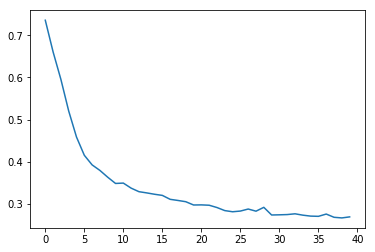

In [17]:


home = pd.read_csv('dataset/nba.games.stats - nba_2018.csv',usecols=['Team'])
away = pd.read_csv('dataset/nba.games.stats - nba_2018.csv',usecols=['Opponent']).values
# print("HOME: ", home[5],"AWAY: ", away[5])
ha = pd.read_csv('dataset/nba.games.stats - nba_2018.csv',usecols=['Home']).values
home = encoder.fit_transform(home)
away = encoder.fit_transform(away)
homeaway = encoder.fit_transform(ha)



new = np.append(home,away,axis=1)
new2 = pd.read_csv('dataset/nba.games.stats - nba_2018.csv',usecols=['FieldGoalsAttempted','FreeThrows','FreeThrowsAttempted','FreeThrows.','OffRebounds','TotalRebounds','Assists','Steals','Blocks','Turnovers','TotalFouls',
                        'Opp.FreeThrows', 
                        'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds', 
                        'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls',
                        'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.', 'Opp.3PointShots']).values




new3 = np.append(new,homeaway,axis=1)
new2 = np.append(new3,new2,axis=1)
winLoss =  pd.read_csv('dataset/nba.games.stats - nba_2018.csv',usecols=['WINorLOSS']).values
winLoss = encoder.fit_transform(winLoss)
points = pd.read_csv('dataset/nba.games.stats - nba_2018.csv',usecols=['TeamPoints','OpponentPoints']).values
points = np.append(points,winLoss,axis=1)
# points.shape
# points = winLoss
# X_train, X_test, y_train, y_test = train_test_split(new2, points, test_size=0.40)
scores = model.evaluate(new2,winLoss)
print(scores)
model.summary()
model.predict(predict)
# print(scores)

# predict = np.asarray([new2[5]])
# hello = model.predict(predict)
# print(hello[0][0], "-",hello[0][1])
print(new2[5])
predict = np.asarray([new2[6]])
print(model.predict(predict))
plt.plot(history.history['loss'])
plt.show()

In [7]:
home = pd.read_csv('dataset/nba.games.stats - nba_2018.csv',usecols=['Team'])
away = pd.read_csv('dataset/nba.games.stats - nba_2018.csv',usecols=['Opponent'])
MAIN = pd.read_csv('dataset/nba.games.stats - nba_prev.csv')

In [8]:
home['Team'][7]

'SAS'

In [9]:
away['Opponent'][7]

'HOU'

In [40]:
predict = np.asarray([new2[220]])
print((model.predict(predict)))
now = model.predict(predict)
if(now>0.5):
    print('1')
else:
    print('0')

[[0.5086734]]
1


In [11]:
new2[41]

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   , 95.   ,  9.   , 14.   ,
        0.643, 16.   , 49.   , 33.   ,  7.   ,  3.   , 18.   , 20.   ,
       86.   ,  0.5  , 15.   , 20.   , 25.   ,  0.8  ,  8.   , 39.   ,
       32.   , 10.   ,  5.   , 14.   , 16.   ])

In [12]:
print(home.loc[home['Team']=='PHI'])

    Team
16   PHI
72   PHI
98   PHI
115  PHI
141  PHI
188  PHI
215  PHI
242  PHI
260  PHI
287  PHI
310  PHI
357  PHI


In [83]:
MAIN

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1690,ATL,16,2017-11-18,Home,BOS,L,99,110,37,...,16,20,0.800,9,41,21,9,6,15,22
1,1791,BOS,17,2017-11-18,Away,ATL,W,110,99,39,...,16,20,0.800,6,35,24,7,1,13,19
2,1593,CHO,15,2017-11-18,Home,LAC,W,102,87,34,...,13,19,0.684,7,44,18,5,6,14,22
3,1796,DAL,17,2017-11-18,Home,MIL,W,111,79,38,...,17,31,0.548,8,38,13,8,5,12,25
4,1699,GSW,16,2017-11-18,Away,PHI,W,124,116,50,...,12,16,0.750,11,40,28,8,5,11,22
5,17100,HOU,17,2017-11-18,Away,MEM,W,105,83,35,...,14,19,0.737,15,48,18,6,7,12,18
6,15102,LAC,15,2017-11-18,Away,CHO,L,87,102,33,...,23,29,0.793,8,49,20,7,9,8,16
7,15104,MEM,15,2017-11-18,Home,HOU,L,83,105,31,...,17,21,0.810,9,45,21,8,9,16,24
8,15106,MIL,15,2017-11-18,Away,DAL,L,79,111,28,...,16,19,0.842,7,49,27,7,2,16,26
9,16111,ORL,16,2017-11-18,Home,UTA,L,85,125,31,...,17,18,0.944,14,54,31,10,4,10,19


In [84]:
print(MAIN.loc[MAIN['Team']=='PHI'])

      Unnamed: 0 Team  Game        Date  Home Opponent WINorLOSS  TeamPoints  \
10         15112  PHI    15  2017-11-18  Home      GSW         L         116   
55         14112  PHI    14  2017-11-15  Away      LAL         W         115   
80         13115  PHI    13  2017-11-13  Away      LAC         W         109   
110        12128  PHI    12  2017-11-11  Away      GSW         L         114   
138        11151  PHI    11  2017-11-09  Away      SAC         L         108   
165        10112  PHI    10  2017-11-07  Away      UTA         W         104   
226         9112  PHI     9  2017-11-03  Home      IND         W         121   
253         8307  PHI     8  2017-11-01  Home      ATL         W         119   
281         7504  PHI     7  2017-10-30  Away      HOU         W         115   
312         6504  PHI     6  2017-10-28  Away      DAL         W         112   
354         5504  PHI     5  2017-10-25  Home      HOU         L         104   
382         4504  PHI     4  2017-10-23 

In [13]:
import tensorflow as tf

In [14]:
home = encoder.fit_transform(home)


In [19]:
index = tf.argmax(home[1], axis=1)

In [24]:
home[5][1]

0

Tensor("ArgMax:0", shape=(), dtype=int64)
